In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import random as alea
from scipy.linalg import solve,pinv,pinv2
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.decomposition import PCA
import time

In [2]:
# import nSimplices 
exec(compile(open(r"nSimplices_final.py", encoding="utf8").read(), "nSimplices_final.py", 'exec'))

# set matplotlib default savefig directory
plt.rcParams["savefig.directory"] = os.getcwd() # To save figures to directory
                                                #   defined above
### test data
data = pd.read_csv(r'datasets/bdd_synthetic_rdim10.csv',sep=';',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,4.010045,7.605912,5.121693,2.012711,13.239657,0.544258,4.096576,7.954744,4.840211,-9.149928,1.989400,2.028782,1.998806,1.999819,2.007038,2.029254,1.989161,2.002128,2.009236,2.029597
1,3.001528,3.607599,-6.757307,5.864029,7.388758,7.200273,-3.970759,5.236329,3.019190,-5.869239,1.996643,2.011125,2.027733,1.974514,1.990747,2.012272,2.008546,2.008311,2.002387,2.003567
2,-0.458328,9.451292,6.094432,-2.259350,-2.666927,1.704595,2.805850,10.609370,1.933497,-5.056886,1.990291,1.988618,2.008213,2.008398,2.006818,1.995737,2.002557,1.989351,1.999557,2.001529
3,-3.071324,10.870284,16.069455,2.340153,3.915481,1.976716,0.772471,6.189006,6.882867,-6.115188,2.014134,2.002410,2.014142,1.994027,1.994113,2.013366,1.982573,2.009980,1.992397,2.007118
4,3.426358,9.121840,0.227281,2.735234,12.896083,7.165633,2.822065,21.318930,2.356204,-4.032068,1.987163,2.007985,1.970851,2.014760,1.992562,2.028419,2.009842,1.987356,2.018408,1.990408


In [3]:
### processing datasets
X=data
X.head()

tab=data
# print("tab shape is:", tab.shape, tab)

D=pdist(tab.copy()) # compute pairwise distance in data
D_TRUE=squareform(D) # true pairwise distance in squared form
print("D shape is:", D.shape)
print(D) 
print("D_TRUE is:", D_TRUE.shape) # transform D into square form matrix
print(D_TRUE)

D shape is: (19900,)
[18.38577499 18.1893768  17.24260121 ... 18.42223762 19.91019496
 14.58746401]
D_TRUE is: (200, 200)
[[ 0.         18.38577499 18.1893768  ... 15.63075061 22.76439088
  22.35144405]
 [18.38577499  0.         22.02790959 ... 18.06523804 16.54806747
  18.4495039 ]
 [18.1893768  22.02790959  0.         ... 13.72805706 17.3242462
  20.49493879]
 ...
 [15.63075061 18.06523804 13.72805706 ...  0.         18.42223762
  19.91019496]
 [22.76439088 16.54806747 17.3242462  ... 18.42223762  0.
  14.58746401]
 [22.35144405 18.4495039  20.49493879 ... 19.91019496 14.58746401
   0.        ]]


In [4]:
### add outliers

proportion=0.05
N=tab.shape[0]
k=int(np.ceil(proportion*N))
# random draw of outliers 
indices=np.sort(alea.sample(range(N),k))
for n in indices:
    horsplan=alea.uniform(-50,50)
    print(horsplan)

    # for each row, add outliers to one of columns 10 to 15 (inclusive)
    # columns 10 to 15 are originally simulated with Guassian(2, 0.05)

    i=alea.randint(10,15)
    print("i is:", i)
    tab.loc[n,i] = horsplan
    print(str(n)+" "+str(i)+" becomes "+ str(horsplan))
print(tab)


-48.91993525595291
i is: 15
4 15 becomes -48.91993525595291
-13.58695058612971
i is: 12
8 12 becomes -13.58695058612971
33.89585436349543
i is: 14
29 14 becomes 33.89585436349543
7.2427273580888425
i is: 11
34 11 becomes 7.2427273580888425
-25.059242939975935
i is: 11
68 11 becomes -25.059242939975935
14.548797370070872
i is: 12
69 12 becomes 14.548797370070872
44.672412438820814
i is: 12
110 12 becomes 44.672412438820814
9.905709533346396
i is: 10
124 10 becomes 9.905709533346396
34.45056353238439
i is: 12
149 12 becomes 34.45056353238439
31.125093886636222
i is: 11
173 11 becomes 31.125093886636222
           0          1          2         3          4          5         6   \
0    4.010045   7.605912   5.121693  2.012711  13.239657   0.544258  4.096576   
1    3.001528   3.607599  -6.757307  5.864029   7.388758   7.200273 -3.970759   
2   -0.458328   9.451292   6.094432 -2.259350  -2.666927   1.704595  2.805850   
3   -3.071324  10.870284  16.069455  2.340153   3.915481   1.976716 

In [5]:

### distances

""" euclidean distances """
N=tab.shape[0] # number of rows 
D=pdist(tab) # pairwise distance in tab (with outliers added)
DSO=squareform(D) # squared matrix form of D

# # """ A few outliers along new axis """
# seed= 112 ; alea.seed(seed)
# sD=squareform(D)
# N=np.shape(sD)[0]
# pc=0.05 #proportion of outliers
# k=int(np.ceil(pc*N))
# np.sort(alea.sample(range(N),k))
# DSO=1.*sD# Tirage aléatoire de quelques points hors plan
# np.sort(alea.sample(range(N),k))
# for n in indices:
#     horsplan=50*alea.random()
#     print ("n,horsplan:"+str(n)+","+str(horsplan))
#     for m in [x for x in range(N) if x !=n]:
#         DSO[n,m]=DSO[m,n]=np.sqrt(DSO[n,m]**2+horsplan**2)

# """ n = 3 , DSO """
# n=3
# Vn=[]
# seed=245124512 ; alea.seed(seed)
# for i in range(1000):
#     indices2=alea.sample(range(N),n+1)
#     Vn.append(nSimplexVolume(indices2,DSO))

# plt.hist(Vn) ; plt.show() # majorité nuls ou presque, un très petit nb ressort
#                          #   (comme ci-dessus, surement dû au bruit).


# ###nSimplices method
# """ Parameters and formatting of input data """
# cutoff=0.5*2*np.sqrt(2)
# trim=0.9

# # En entrée : DSO, qui contient quelques outliers hors-plan
# lDSO=squareform(DSO) # shape DSO as other matrices, i.e. as a N*(N-1)/2-sized flat matrix.
# data=squareform(lDSO)    #squareform( DNd ) #squareform(DNne)
# #(D+1.*np.array(Noise)) ou 1e-6,1e-5,... 1., 10. *Noise
# #D, Dd, DO, DOd, DSO, DNd. (Ddne)


# """ Applications of nSimplices :
#     - dimension detection
#     - outlier detection
#     - outliers are projected into relevant dimension
#     - result : distance matrix to be used in classical MDS, for instance.
# """
# print("\n Application of nSimplex \n ")
# t1=time.time()
# resu=nSimplwhichdim(data,cutoff,trim,ngmetric="rkurtosis",nf=5)
# t2=time.time()
# var = np.array(resu[0][3][0])**2 / (2*np.mean(data,0))
# print (np.std(resu[0][3][0]) , np.std(resu[0][3][0] / np.sqrt(2*np.mean(data,0))), np.std( var ), 1.4826*np.median(abs(var-np.median(var))))


# """ cMDS and plot """

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))
# #fig.suptitle('Horizontally stacked subplots')
# #
# va, ve, Xe = cMDS(D_TRUE)
# ax1.plot(Xe[:,0],Xe[:,1],'.')
# ax1.set_title("TRUE")
# #
# va, ve, Xe = cMDS(DSO)
# ax2.plot(Xe[:,0],Xe[:,1],'.', color='orange')
# ax2.set_title("Contaminated")
# #
# va, ve, Xe = cMDS(resu[3][3])

# ax3.plot(Xe[:,0],Xe[:,1],'.', color='green')
# ax3.set_title("Corrected")

# #ax3.legend(targets)
# ax3.grid()
# plt.show()


# # ax3.plot(Xe[:,0],Xe[:,1],'.', color='green')
# # ax3.set_title("Restituted")
# # plt.show()


# ### PCA

# pca_method = PCA(n_components=2)
# t3=time.time()
# principalComponents_test1 = pca_method.fit_transform(data_test1)
# t4=time.time()
# Df_pc_test1=pd.DataFrame(data = principalComponents_test1
#              , columns = ['principal component 1', 'principal component 2'])

# # pca_method.components_

# #plot le Df de PCA

# Df_pc_test1['type']="normal"

# for i in indices:

#     Df_pc_test1.loc[i,'type']="contaminated"

# fig = plt.figure(figsize=(4,4))
# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# #targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# #colors = ['r', 'g', 'b']


# targets = ["normal","contaminated"]
# colors = ['b','r']

# for target, color in zip(targets,colors):
#     indicesToKeep = Df_pc_test1['type'] == target
#     ax.scatter(Df_pc_test1.loc[indicesToKeep, 'principal component 1']
#                , Df_pc_test1.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()
# plt.show()

# ###Temps d'exécution
# print(" ")
# T1=t2-t1
# print(f"nSimplex tourne en {T1} s")
# T2=t4-t3
# print(f"PCA tourne en {T2} s")


In [6]:

### nSimplices method
d=20
T1=time.time()
dico_outlier,rdim,cdata_proj=nSimplices(DSO,d,n0=1,nf=13)
T2=time.time()

print(T2-T1)

22.532042829157298
correction of outliers
[[ 0.1488301   0.32739753  0.00782474  0.10066567  0.24507748  0.20799012
  -0.05132997  0.14710429  0.16481626 -0.48743592 -0.26173675 -0.09309156
  -0.04610567  0.46984136 -0.19138162  0.18095431  0.1241059   0.0563307
   0.24320317  0.14479912]
 [-0.36652567 -0.12912952 -0.24844125  0.01100696  0.06293069 -0.19534302
   0.15062562  0.06301344  0.00775547  0.16359708 -0.51933511  0.06692244
  -0.098395    0.06861913  0.04556352  0.02875198  0.03878372  0.19342458
   0.36919012 -0.47417208]
 [-0.09365616  0.11438643  0.18561905  0.01799214  0.22679192 -0.07083779
   0.35738429 -0.16296194  0.42564496  0.25785863 -0.1226338   0.27950849
   0.08224833 -0.13343226 -0.11156668 -0.16154338  0.34122567 -0.32406685
   0.12607123  0.30223186]
 [-0.04237094 -0.23944792  0.03091428  0.3510536  -0.19578474  0.41333432
   0.07658651 -0.49087035 -0.2401999  -0.07665522 -0.128099    0.19002806
   0.21903398  0.00595471 -0.35268196  0.16985944 -0.07670813 -0

D shape is: (200, 200)
Dcc shape is: (200, 200)
evals shape is: (200,)
evecs shape is: (200, 200)
fitered evecst shape is: (200, 108)
Xe shape is: (200, 108)
D shape is: (200, 200)
Dcc shape is: (200, 200)
evals shape is: (200,)
evecs shape is: (200, 200)
fitered evecst shape is: (200, 107)
Xe shape is: (200, 107)
D shape is: (200, 200)
Dcc shape is: (200, 200)
evals shape is: (200,)
evecs shape is: (200, 200)
fitered evecst shape is: (200, 106)
Xe shape is: (200, 106)


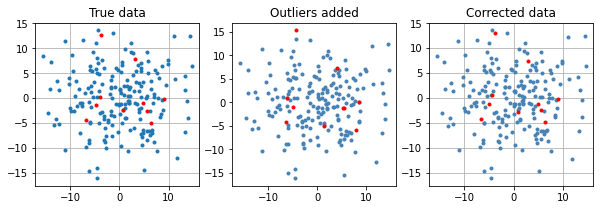

           0          1          2         3          4          5         6   \
0    4.010045   7.605912   5.121693  2.012711  13.239657   0.544258  4.096576   
1    3.001528   3.607599  -6.757307  5.864029   7.388758   7.200273 -3.970759   
2   -0.458328   9.451292   6.094432 -2.259350  -2.666927   1.704595  2.805850   
3   -3.071324  10.870284  16.069455  2.340153   3.915481   1.976716  0.772471   
4    3.426358   9.121840   0.227281  2.735234  12.896083   7.165633  2.822065   
..        ...        ...        ...       ...        ...        ...       ...   
195 -6.647445  12.008214   6.553909 -5.069374   4.906612  -0.559627 -1.316861   
196  0.292916   5.771035   4.965959 -5.878246   2.730650   9.922857 -0.172056   
197  3.181701   3.515342   2.318699 -3.217959   6.200707  -0.053149  1.125281   
198 -3.037787   3.409201   1.433254  0.379645   1.233900  14.226823 -0.503712   
199 -2.963765  11.108813   3.412951 -0.997538   6.781572  12.238649 -4.729192   

            7          8   

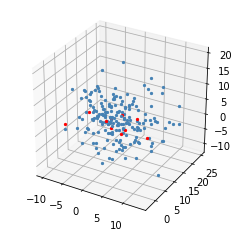

In [7]:

### Plot in 2D using the two largest eigenvalues
inlist=dico_outlier # list of outliers
notinlist=[i for i in range(200) if i not in inlist] # list of normal points 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

# plot original graph
va, ve, Xe = cMDS(D_TRUE)
ax1.plot(Xe[notinlist,0],Xe[notinlist,1],'.')
ax1.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
ax1.set_title("True data")
ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = cMDS(DSO)
ax2.plot(Xe[notinlist,0],Xe[notinlist,1],'.', color='steelblue')
ax2.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
ax2.set_title("Outliers added")
va, ve, Xe = cMDS(cdata_proj)   

# plot correct outliers 
ax3.plot(Xe[notinlist,0],Xe[notinlist,1],'.', color='steelblue')
ax3.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
ax3.set_title("Corrected data")
ax3.grid()
plt.show()

### Plot in 3D using the three largest eigenvalues
tab = data
print(data)
coord=np.array(tab)
ttab=np.array(coord)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

for i in range(200):
    e=ttab[i]
    if (i in inlist):
        ax.scatter(e[0],e[1],0, s = 5,color='red')
        ax.scatter(e[0],e[1],e[2], s = 5,color=[1,1,1,0])
    else:
        ax.scatter(e[0],e[1],e[2], s = 5,color
        ='steelblue')


plt.show()

In [8]:

# ###Correction

# a,b=CorrectProjection(200,coord,[ 34,  99, 121, 178],4)
# c=b[66].reshape((20,2))
# d=coord[66].reshape((20,2))
# plt.figure()
# plt.plot(c[:,0],c[:,1],label="corrected")
# plt.plot(d[:,0],d[:,1],label="true cell")
# plt.plot()
# plt.legend()
# # for e in c:
# #     plt.scatter(e[0],e[1],s=5)

# plt.show()


# ###PCvPC (does not work)
# ttab=np.array(coord_corr)

# fig, axs = plt.subplots(3, 3)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('PC1vPC2')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('PC1vPC3')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('PC2vPC3')
# axs[0, 2].plot(x, -y, 'tab:red')
# axs[0, 2].set_title('PC1vPC4')
# axs[1, 2].plot(x, -y, 'tab:red')
# axs[1, 2].set_title('PC2vPC4')
# axs[2, 2].plot(x, -y, 'tab:red')
# axs[2, 2].set_title('PC3vPC4')
# plt.show()


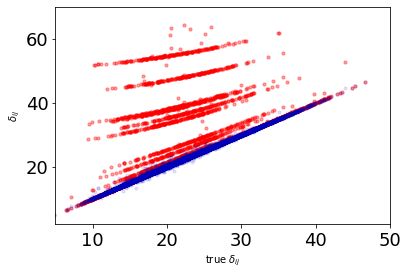

0.08745829406014102


In [14]:
### Importance of dimension correction in higher dimension -Fig.3(C) Shepard Diagram

DSO_flat=DSO.flatten() # [200*200]
D_TRUE_flat=D_TRUE.flatten()
cdata_proj_flat=cdata_proj.flatten()

plt.figure()
SMALL_SIZE=18
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.scatter(D_TRUE_flat,DSO_flat,color='red',alpha=0.2,s=10)
plt.scatter(D_TRUE_flat,cdata_proj_flat,color='mediumblue',alpha=0.05,s=10)

plt.xlabel(r"true $\delta_{ij}$")
plt.ylabel(r'$\delta_{ij}$')
axes = plt.gca()
axes.set_xlim(5,50)
axes.set_ylim(2,70)

plt.show()

diff=np.abs(cdata_proj_flat-D_TRUE_flat)
print(np.mean(diff))

In [18]:
# ### PCA (not in use)

# pca_method = PCA()
# principalComponents_test1 = pca_method.fit_transform(tab)
# #Df_pc_test1=pd.DataFrame(data = principalComponents_test1, columns = ['principal component 1', 'principal component 2'])

# # print(len(pca_method.components_))
# # print(pca_method.components_)
# print("pca_method.explained_variance_ratio_ shape is:", np.cumsum(pca_method.explained_variance_ratio_).shape)
# # print(pca_method.explained_variance_)

# plt.figure()
# plt.plot(range(0,20),np.cumsum(pca_method.explained_variance_ratio_),label="% variance explained cumulative")
# plt.plot(range(0,20),pca_method.explained_variance_ratio_,label="% variance explained")
# plt.legend()
# plt.show()

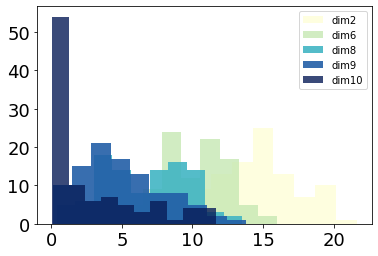

In [60]:
### Importance of dimension correction in higher dimension -Fig.3(A) height distribution
N=200
B=100

hcolls = []
start_dim = 2
end_dim = 15
for dim in range(start_dim, end_dim+1):
    _, hcoll = DrawNSimplices(DSO,N,B,0,dim)
    hcolls.append(hcoll)


blues=np.array([[255,255,217,256*0.8],[199,233,180,256*0.8], [65,182,196,256*0.9], [34,94,168,256*0.9], [8,29,88,256*0.8]])/256

plt.figure()
# select a few dimensions (i.e. 2,6,8,9,10) for demonstrating the distributions of heights
plt.hist(hcolls[2-start_dim],label='dim2',color=blues[0])
plt.hist(hcolls[6-start_dim],label='dim6',color=blues[1])
plt.hist(hcolls[8-start_dim],label='dim8',color=blues[2])
plt.hist(hcolls[9-start_dim],label='dim9',color=blues[3])
plt.hist(hcolls[10-start_dim],label='dim10',color=blues[4])
plt.legend()
plt.show()


h_med_ratios are: [1.0715818840505844, 1.0687858176253, 1.059057401625329, 1.1761551407036874, 1.159928534807989, 1.2814661839037131, 1.560173362124773, 4.977463970214359, 5.069645100878695, 1.348208908399384, 1.3375806410664424, 1.2983685978803061, 1.2777403838221026]


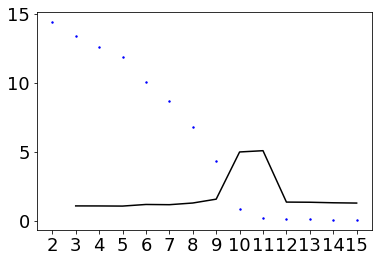

In [68]:
### Importance of dimension correction in higher dimension -Fig.3(B) dimensionality inference

# calculate median heights for tested dimension from start_dim to end_dim
h_meds = []
for hcoll in hcolls:
    h_meds.append(np.median(hcoll))

# calculate the ratio, where h_med_ratios[i] corresponds to h_meds[i-1]/h_meds[i]
# which is the (median height of dim (i-1+start_dim))/(median height of dim (i+start_dim))
h_med_ratios = []
for i in range(1, len(hcolls)):
    h_med_ratios.append(h_meds[i-1]/h_meds[i])

print("h_med_ratios are:", h_med_ratios)
# plot the height scatterplot and the ratios

plt.figure()
plt.scatter(list(range(start_dim, end_dim+1)), h_meds, c ="blue", s=2)
plt.plot(list(range(start_dim+1, end_dim+1)), h_med_ratios, c="black")
plt.xticks(np.arange(start_dim, end_dim+1, 1))
plt.show()

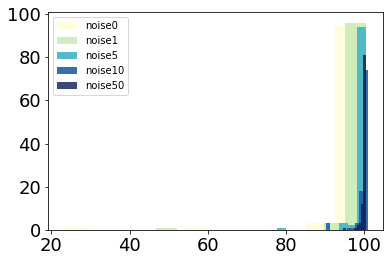

99.94455230728073 79.10007184578433
99.98845512224455 28.999638221612763
99.94122742263659 5.790144474803811
99.96673051554149 2.921233009007775
99.9515279685166 0.41843034923674693


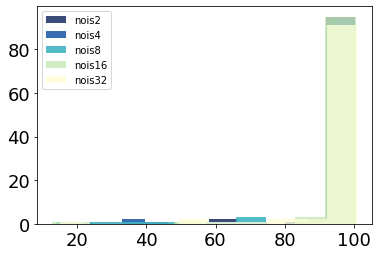

99.62487299334254 140.57278505678033
99.85175250973299 101.38529980950872
99.89073593424564 219.58319764885115
99.95024962033895 115.9098384654537
99.9804073029758 105.5068969297298


In [11]:
### noise influence (not in use? why testing noise of different dimensions?)

data_n = pd.read_csv(r'outputs/noise0.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll0=DrawNSimplices(DSO,N,B,0,4)

data_n = pd.read_csv(r'outputs/noise1.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll1=DrawNSimplices(DSO,N,B,0,4)

data_n = pd.read_csv(r'outputs/noise5.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll5=DrawNSimplices(DSO,N,B,0,4)

data_n = pd.read_csv(r'outputs/noise10.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll10=DrawNSimplices(DSO,N,B,0,4)

data_n = pd.read_csv(r'outputs/noise50.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll50=DrawNSimplices(DSO,N,B,0,4)

blues=np.array([[255,255,217,256*0.8],[199,233,180,256*0.8], [65,182,196,256*0.9], [34,94,168,256*0.9], [8,29,88,256*0.8]])/256

plt.figure()
plt.hist(hcoll0,label='noise0',color=blues[0])
plt.hist(hcoll1,label='noise1',color=blues[1])
plt.hist(hcoll5,label='noise5',color=blues[2])
plt.hist(hcoll10,label='noise10',color=blues[3])
plt.hist(hcoll50,label='noise50',color=blues[4])
plt.legend()
plt.show()

print(np.median(hcoll0),np.var(hcoll0))
print(np.median(hcoll1),np.var(hcoll1))
print(np.median(hcoll5),np.var(hcoll5))
print(np.median(hcoll10),np.var(hcoll10))
print(np.median(hcoll50),np.var(hcoll50))

### Test influence bruit 2

data_n = pd.read_csv(r'outputs/nois2.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll0=DrawNSimplices(DSO,N,B,0,2)

data_n = pd.read_csv(r'outputs/nois4.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll1=DrawNSimplices(DSO,N,B,0,4)

data_n = pd.read_csv(r'outputs/nois8.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll5=DrawNSimplices(DSO,N,B,0,8)

data_n = pd.read_csv(r'outputs/nois16.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll10=DrawNSimplices(DSO,N,B,0,16)

data_n = pd.read_csv(r'outputs/nois32.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll50=DrawNSimplices(DSO,N,B,0,32)

blues=np.array([[255,255,217,256*0.8],[199,233,180,256*0.8], [65,182,196,256*0.9], [34,94,168,256*0.9], [8,29,88,256*0.8]])/256

plt.figure()
plt.hist(hcoll0,label='nois2',color=blues[4])
plt.hist(hcoll1,label='nois4',color=blues[3])
plt.hist(hcoll5,label='nois8',color=blues[2])
plt.hist(hcoll10,label='nois16',color=blues[1])
plt.hist(hcoll50,label='nois32',color=blues[0])
plt.legend()
plt.show()

print(np.median(hcoll50),np.var(hcoll50))
print(np.median(hcoll10),np.var(hcoll10))
print(np.median(hcoll5),np.var(hcoll5))
print(np.median(hcoll1),np.var(hcoll1))
print(np.median(hcoll0),np.var(hcoll0))

/Users/wanxinli/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


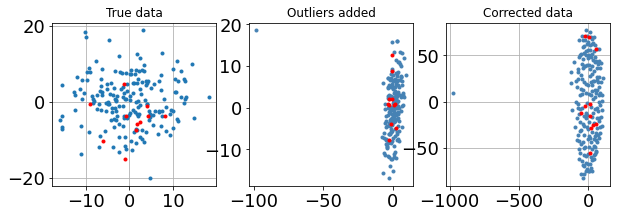

In [12]:
### Test passage distance à coordonnées (not in use?)

clf = manifold.MDS(n_components=2, max_iter=1000)
cdata2_coord = clf.fit_transform(DSO)

D2=pdist(cdata2_coord)
DSO2=squareform(D2)


inlist=dico_outlier
notinlist=[i for i in range(200) if i not in inlist]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))
#fig.suptitle('Horizontally stacked subplots')
#
va, ve, Xe = cMDS(D_TRUE)
ax1.plot(Xe[notinlist,0],Xe[notinlist,1],'.')
ax1.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
# ax1.plot(Xe[:,0],Xe[:,1],'.')
ax1.set_title("True data")
ax1.grid()
#
va, ve, Xe = cMDS(DSO)
ax2.plot(Xe[notinlist,0],Xe[notinlist,1],'.', color='steelblue')
ax2.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
# ax2.plot(Xe[:,0],Xe[:,1],'.',color='orange')
ax2.set_title("Outliers added")
#
va, ve, Xe = cMDS(DSO2)   #cdata_proj)

#Xe=pd.DataFrame(np.asarray([Xe[:,1],Xe[:,2]]).T, columns = ['principal component 1', 'principal component 2'])
ax3.plot(Xe[notinlist,0],Xe[notinlist,1],'.', color='steelblue')
ax3.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
# ax3.plot(Xe[:,0],Xe[:,2],'.',color='green')
ax3.set_title("Corrected data")
#ax3.legend(targets)
ax3.grid()
plt.show()


In [19]:
# ##Test évolution des distances avant/après MDS

# #DSO corrigées
# #

# dico_h
# Dis=pdist(dico_h)
# DSO_MDS=squareform(Dis)


# DSO_flat=DSO.flatten()
# DSO_MDS_flat=DSO_MDS.flatten()

# plt.figure()
# SMALL_SIZE=18
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.scatter(DSO_flat,DSO_MDS_flat,alpha=0.2,s=10)

# plt.xlabel(r"true $\delta_{ij}$")
# plt.ylabel(r'$\delta_{ij}$')

# plt.show()

